In [1]:
import pandas as pd

### Load the data

In [4]:
df = pd.read_csv("lmdata.csv")
df.head()

,latitude,mortality
0,33.0,219
1,34.0,222
2,35.0,225
3,36.0,228
4,37.0,231


In [5]:
df.columns

Index(['latitude', 'mortality'], dtype='object')

### Get descriptive statistics

In [10]:
df.count()

latitude     24
mortality    24
dtype: int64

In [9]:
df['mortality'].describe()

count     24.000000
mean     255.250000
std       23.882411
min      219.000000
25%      236.250000
50%      253.500000
75%      271.250000
max      300.000000
Name: mortality, dtype: float64

### Create a line plot

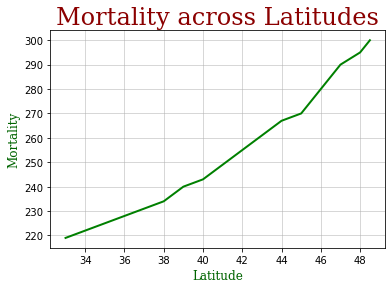

In [22]:
import matplotlib.pyplot as plt

#create plots
plt.plot(df['latitude'], df['mortality'], color ='green', linewidth='2')

#set font families
font1 = {'family':'serif','color':'darkred','size':24}
font2 = {'family':'serif','color':'darkgreen','size':12}

#axis labels
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Mortality', fontdict=font2)
#Title
plt.title("Mortality across Latitudes", fontdict=font1)

#add gridlines
plt.grid(linewidth=0.5)
plt.show()

### Create a scatter plot

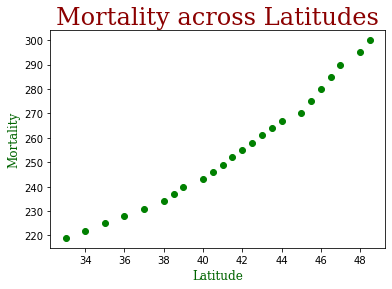

In [23]:
#create plots
plt.scatter(df['latitude'], df['mortality'], color ='green')

#set font families
font1 = {'family':'serif','color':'darkred','size':24}
font2 = {'family':'serif','color':'darkgreen','size':12}

#axis labels
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Mortality', fontdict=font2)
#Title
plt.title("Mortality across Latitudes", fontdict=font1)


plt.show()

### Scatter plot using sseaborn

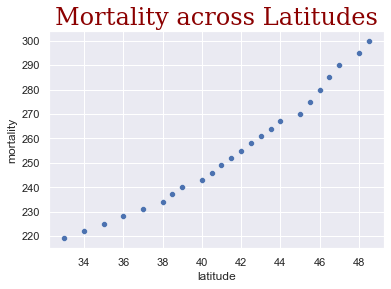

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "darkgrid")

sns.scatterplot(data=df, x='latitude', y='mortality')
plt.title("Mortality across Latitudes", fontdict=font1)
plt.show()

### Create box plot

#### Using pandas

<AxesSubplot:>

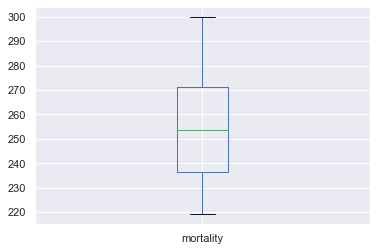

In [31]:
df['mortality'].plot.box(grid='True')

#### Using matplotlib

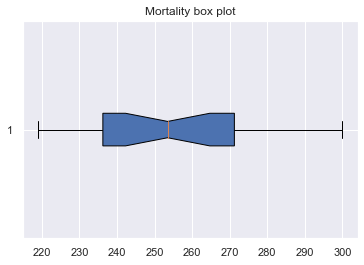

In [39]:
import matplotlib.pyplot as plt


plt.boxplot(df['mortality'],patch_artist = True,
                notch ='True', vert = 0)

plt.title("Mortality box plot")
plt.show()

 ### Pearson’s correlation test for the variables

#### Using Pandas

In [52]:
import pandas as pd

x = df['latitude']
y = df['mortality']

r1 = x.corr(y)
r2 = y.corr(x)
print(r1)
print(r2)

0.9852255752964676
0.9852255752964676


#### Using numpy

In [47]:
import numpy as np
import matplotlib.pyplot as plt

#convert dataframe to numpy array
x = df['latitude'].to_numpy()
y = df['mortality'].to_numpy()

result = np.corrcoef(x,y)
print(result)
print(result[0,1])
print(result[1,0])



[[1.         0.98522558]
 [0.98522558 1.        ]]
0.9852255752964676
0.9852255752964676


In [ ]:
#### Using Scipy

**This is a strong positive correlation**

In [55]:
import numpy as np
import scipy.stats

#convert dataframe to numpy array
x = df['latitude'].to_numpy()
y = df['mortality'].to_numpy()

#result is the correlation coefficient and p value
r, p = scipy.stats.pearsonr(x,y)

#corelation coefficient
print(r)
#p value
print(p)

0.9852255752964678
2.3563466568322043e-18


### The default pair plot

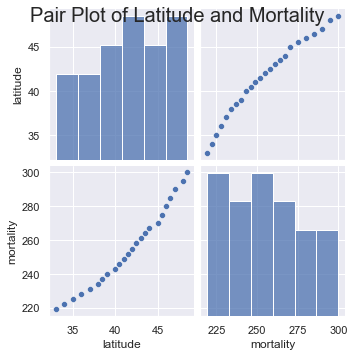

In [60]:
import seaborn as sns

sns.pairplot(df)

# Title 
plt.suptitle('Pair Plot of Latitude and Mortality', 
             size = 20);

### Regression model

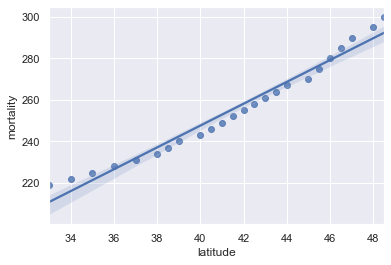

In [76]:
import seaborn as sns


x_data = df['latitude']
y_data = df['mortality']


sns.regplot(x=x_data,y=y_data, ci=95)
plt.show()

In [81]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

a = df[['latitude']]
b = df['mortality']

#a = sm.add_constant(a) 
model =sm.OLS(b,a).fit()
predicton = model.predict(a)

details = model.summary()
print(details)

                                 OLS Regression Results                                
Dep. Variable:              mortality   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.803e+04
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                    1.09e-39
Time:                        17:58:17   Log-Likelihood:                         -75.435
No. Observations:                  24   AIC:                                      152.9
Df Residuals:                      23   BIC:                                      154.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------